acc-75 at first

(303, 14)
              precision    recall  f1-score   support

           0       0.70      0.73      0.71        41
           1       0.77      0.74      0.76        50

    accuracy                           0.74        91
   macro avg       0.73      0.74      0.73        91
weighted avg       0.74      0.74      0.74        91



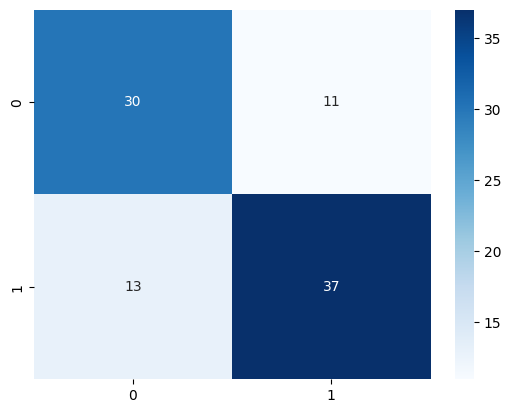

In [9]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import pandas as pd
from sklearn.metrics import (confusion_matrix,classification_report)
import seaborn as sns
data=pd.read_csv('/content/heart.csv')
data=pd.DataFrame(data)
print(data.shape)
x=data.drop(columns='target',axis=1)
y=data['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(x_train, y_train)
xtep=model.predict(x_test)

# test model evaluvation
ans=classification_report(y_test, xtep)
print(ans)
c=confusion_matrix(y_test,xtep)
sns.heatmap(c,annot=True, fmt="d", cmap="Blues")
pyplot.show()

feature extracting

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Feature: 0, Score: 0.08261
Feature: 1, Score: 0.03319
Feature: 2, Score: 0.15457
Feature: 3, Score: 0.06984
Feature: 4, Score: 0.08080
Feature: 5, Score: 0.00608
Feature: 6, Score: 0.01676
Feature: 7, Score: 0.11951
Feature: 8, Score: 0.10992
Feature: 9, Score: 0.11936
Feature: 10, Score: 0.04374
Feature: 11, Score: 0.09589
Feature: 12, Score: 0.06773


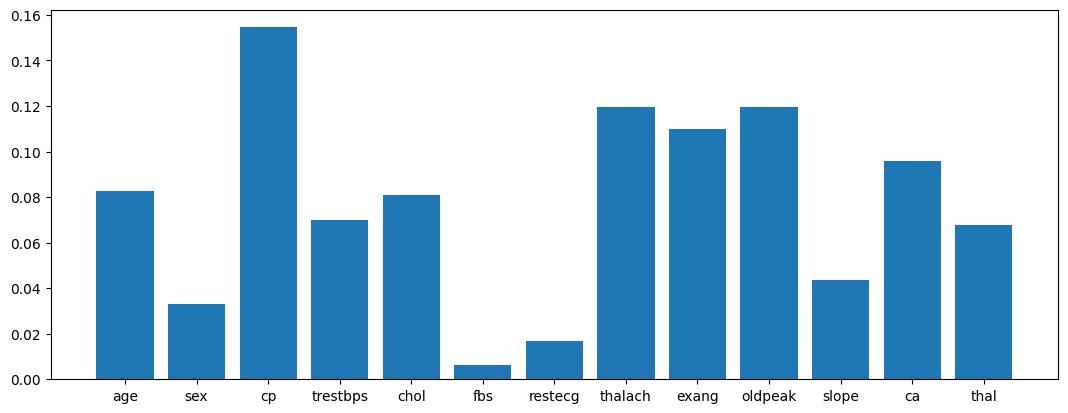

In [10]:
import matplotlib.pyplot as plt
column_names=list(data.columns.values)[:-1]
print(column_names)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure().set_figwidth(13)
plt.bar([x for x in column_names], importance)
plt.show()

after feature extracting acc-82

(303, 5)
              precision    recall  f1-score   support

           0       0.84      0.76      0.79        41
           1       0.81      0.88      0.85        50

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



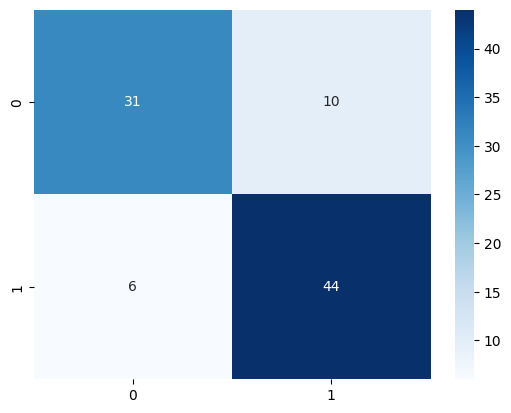

In [15]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import pandas as pd
from sklearn.metrics import (confusion_matrix,classification_report)
import seaborn as sns
data=pd.read_csv('/content/EH.csv')
data=pd.DataFrame(data)

print(data.shape)
x=data.drop(columns='target',axis=1)
y=data['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(x_train, y_train)
xtep=model.predict(x_test)

# test model evaluvation
ans=classification_report(y_test, xtep)
print(ans)
c=confusion_matrix(y_test,xtep)
sns.heatmap(c,annot=True, fmt="d", cmap="Blues")
pyplot.show()

result

In [12]:
a=(1,103,1,3)
# cp,thalach,ca,thal
anp=np.asarray(a)
r=anp.reshape(1,-1)
p=model.predict(r)
print(p[0])
if p[0]==0:
  print("The person is not Heart")
else:
  print("The person is Heart")

0
The person is not Heart


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


SMOTE

In [13]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print('Before OverSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


Before OverSampling, counts of label '1': 115
Before OverSampling, counts of label '0': 97 

Before OverSampling, the shape of train_X: (212, 4)
Before OverSampling, the shape of train_y: (212,) 

After OverSampling, the shape of train_X: (230, 4)
After OverSampling, the shape of train_y: (230,) 

After OverSampling, counts of label '1': 115
After OverSampling, counts of label '0': 115


after SMOTE acc-68

              precision    recall  f1-score   support

           0       0.62      0.76      0.68        41
           1       0.76      0.62      0.68        50

    accuracy                           0.68        91
   macro avg       0.69      0.69      0.68        91
weighted avg       0.69      0.68      0.68        91



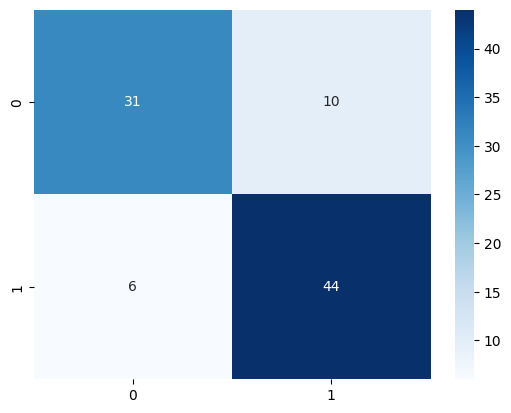

In [14]:
lr1 = RandomForestClassifier()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(x_test)

# print classification report
print(classification_report(y_test, predictions))
c=confusion_matrix(y_test,xtep)
sns.heatmap(c,annot=True, fmt="d", cmap="Blues")
pyplot.show()